# Competition 
## Domain : HR Analytics

## Submitted by Group - 7

## Contributors : Fen Francis Pereira, Jayaram K, Ashmina T.

**Objective:**
 1) Data collection from given domain

 2) Pre-processing 
    
         2.1)Missing values handling
         2.2)Outlier detection and handling
         2.3)Encoding
         2.4)Feature reduction
         2.5)Standardization/Normalization
         2.6)Feature engineering
      
 3) Exploratory data analysis 

       3.1)Univariate analysis
       3.2)Bivariate analysis
        
 4) Modelling 

 5) Model fine tuning

# 1. Data collection from given domain

The domain assigned to our group is HR Analytics. 

Since it is HR related, we selected a dataset with which we can predict the Employee Attrition.

We will now start the process of building Supervised learning model using this data set. 

In [136]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# Load the dataset into python environment
data = pd.read_csv('HR_Engagement_Sat.csv')

In [138]:
# To display entire columns
pd.pandas.set_option('display.max_columns',None)
# Displaying first 5 five rows
data.head(5)

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [139]:
data.shape

(14999, 62)

- Data set is containing 62 columns and 14999 rows.

### Data description:

1.	ID : Employee ID
2.	Name: Employee Name  
3.	Department: The functional department that the employee belongs to.
4.	GEO: The working geography that the employee belongs to in a matrix organization.
5.	Role: The employee's position or title.
6.	Rising_Star: Indicates the level of promise or promote-ability the employee has.
7.	Will_Relocate: Is the employee willing to relocate?
8.	Critical: Is the employee critical to the organization?
9.	Trending Perf: How is the employee trending in performance this year?
10.	Talent_Level: This field represents a subjective level of management's view of the employee.
11.	Validated_Talent_Level: This field senior managements view of what the manager stated.
12.	Percent_Remote: The percentage of the employee's work that is done remotely.

13.	EMP_Sat_OnPrem_1 One indicator from a survey that was sent to employees by a third party. On prem (On premise) means that the employee maintains a high percentage of work on the corporation’s physical work locations.
14.	EMP_Sat_OnPrem_2 One indicator from a survey that was sent to employees by a third party. On prem (On premise) means that the employee maintains a high percentage of work on the corporation’s physical work locations.
15.	EMP_Sat_OnPrem_3 One indicator from a survey that was sent to employees by a third party. On prem (On premise) means that the employee maintains a high percentage of work on the corporation’s physical work locations.
16.	EMP_Sat_OnPrem_4 One indicator from a survey that was sent to employees by a third party. On prem (On premise) means that the employee maintains a high percentage of work on the corporation’s physical work locations.
17.	EMP_Sat_OnPrem_5 One indicator from a survey that was sent to employees by a third party. On prem (On premise) means that the employee maintains a high percentage of work on the corporation’s physical work locations.

18.	EMP_Sat_Remote_1 One indicator from a survey that was sent to employees by a third party. Remote (distance employee) means that the employee does a high percentage of work away from the corporation’s physical work locations.
19.	EMP_Sat_Remote_2 One indicator from a survey that was sent to employees by a third party. Remote (distance employee) means that the employee does a high percentage of work away from the corporation’s physical work locations.
20.	EMP_Sat_Remote_3 One indicator from a survey that was sent to employees by a third party. Remote (distance employee) means that the employee does a high percentage of work away from the corporation’s physical work locations.
21.	EMP_Sat_Remote_4 One indicator from a survey that was sent to employees by a third party. Remote (distance employee) means that the employee does a high percentage of work away from the corporation’s physical work locations.
22.	EMP_Sat_Remote_5 One indicator from a survey that was sent to employees by a third party. Remote (distance employee) means that the employee does a high percentage of work away from the corporation’s physical work locations.

23.	EMP_Engagement_1 One indicator from a survey that was sent to employees by a third party. Engagement represents the employee's feeling about how they feel about being engaged in company activities.
24.	EMP_Engagement_2 One indicator from a survey that was sent to employees by a third party. Engagement represents the employee's feeling about how they feel about being engaged in company activities.
25.	EMP_Engagement_3 One indicator from a survey that was sent to employees by a third party. Engagement represents the employee's feeling about how they feel about being engaged in company activities.
26.	EMP_Engagement_4 One indicator from a survey that was sent to employees by a third party. Engagement represents the employee's feeling about how they feel about being engaged in company activities.
27.	EMP_Engagement_5 One indicator from a survey that was sent to employees by a third party. Engagement represents the employee's feeling about how they feel about being engaged in company activities.

28.	last_evaluation: The score on the last employee evaluation.
29.	number_project: The number of projects the employee works on throughout the year.
30.	average_montly_hours: The average number of hours the employee works.
31.	time_spend_company: Years of service.
32.	Work_accident: The number of accidents the employee is involved in.
33.	left_Company: Did the employee leave the company?
34.	CSR Factor: Ignore
35.	promotion_last_5years: Did the employee get promoted in last 5 years?
36.	sales: Ignore

37.	salary: Relative pay grade (low, medium, high) by role.

38.	Gender: Gender or how the person identifies.

39.	LinkedIn_Hits The number of times employee visits LinkedIn networking sites.

40.	Emp_Work_Status2 One indicator from a survey that was sent to employees by a third party. Status represents how strongly employee feels about their status level in the organization.
41.	Emp_Work_Status_3 One indicator from a survey that was sent to employees by a third party. Status represents how strongly employee feels about their status level in the organization.
42.	Emp_Work_Status_4 One indicator from a survey that was sent to employees by a third party. Status represents how strongly employee feels about their status level in the organization.
43.	Emp_Work_Status_5 One indicator from a survey that was sent to employees by a third party. Status represents how strongly employee feels about their status level in the organization.

44.	Emp_Identity How the employee identifies themselves with the company.
45.	Emp_Role How the employee identifies themselves with the importance of their role in the company.
46.	Emp_Position How the employee identifies themselves with the importance of their position in the company.
47.	Emp_Title: How the employee feels about their title.

48.	Women_Leave: Women who left the company.
49.	Men_Leave: Men who left the company.

50.	Emp_Competitive_1 One indicator from a survey that was sent to employees by a third party. How employee feels about the competitive nature of work in the organization.
51.	Emp_Competitive_2 One indicator from a survey that was sent to employees by a third party. How employee feels about the competitive nature of work in the organization.
52.	Emp_Competitive_3 One indicator from a survey that was sent to employees by a third party. How employee feels about the competitive nature of work in the organization.
53.	Emp_Competitive_4 One indicator from a survey that was sent to employees by a third party. How employee feels about the competitive nature of work in the organization.
54.	Emp_Competitive_5 One indicator from a survey that was sent to employees by a third party. How employee feels about the competitive nature of work in the organization.

55.	Emp_Collaborative_1 One indicator from a survey that was sent to employees by a third party. How employee feels about the collaborative nature of work in the organization.
56.	Emp_Collaborative_2 One indicator from a survey that was sent to employees by a third party. How employee feels about the collaborative nature of work in the organization.
57.	Emp_Collaborative_3 One indicator from a survey that was sent to employees by a third party. How employee feels about the collaborative nature of work in the organization.
58.	Emp_Collaborative_4 One indicator from a survey that was sent to employees by a third party. How employee feels about the collaborative nature of work in the organization.
59.	Emp_Collaborative_5 One indicator from a survey that was sent to employees by a third party. How employee feels about the collaborative nature of work in the organization.

60.	Sensor_StepCount: Sentient devices are used to capture certain employee activities. In this case number of steps.
61.	Sensor_Heartbeat(Average/Min): Sentient devices are used to capture certain employee activities. In this case heartbeat.
62.	Sensor_Proximity(1-highest/10-lowest): Sentient devices are used to capture certain employee activities. In this case how close they are to their company laptop.


# 2a. Pre-processing (1st Stage)

### 2.1. Missing values handling

In [140]:
# Checking for Null values in the data
nan_columns = data[data.columns[data.isnull().any()]]
nan_columns.isnull().sum()

Name                    2
Rising_Star         14978
Critical            14519
EMP_Sat_OnPrem_1      128
EMP_Sat_OnPrem_2      128
EMP_Sat_OnPrem_3      128
EMP_Sat_OnPrem_4      128
EMP_Sat_OnPrem_5      128
CSR Factor          13286
Women_Leave          7403
Men_Leave           10134
dtype: int64

- There are null values present in the data set. We need to handle these missing values effectively. 

### 2.2. Feature engineering

We will create a new feature named 'Satisfaction', which indicate the employee satisfaction score.  
Our dataset is containing different survey results to understand the employee satisfaction. 
Employees were provided with different questions to evaluate their satisfaction and they gave a rating between 1 - 5.
We will use this survey results to calculate the employee satisfaction score.

In [141]:
satisfaction = data[['EMP_Sat_OnPrem_1','EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4','EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1', 'EMP_Sat_Remote_2','EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5','EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3','EMP_Engagement_4', 'EMP_Engagement_5','Emp_Work_Status2', 'Emp_Work_Status_3', 'Emp_Work_Status_4',       'Emp_Work_Status_5', 'Emp_Identity', 'Emp_Role', 'Emp_Position',
       'Emp_Title', 'Emp_Competitive_1', 'Emp_Competitive_2',       'Emp_Competitive_3', 'Emp_Competitive_4', 'Emp_Competitive_5',
       'Emp_Collaborative_1', 'Emp_Collaborative_2', 'Emp_Collaborative_3',       'Emp_Collaborative_4', 'Emp_Collaborative_5']]
satisfaction.head()

,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5
0,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5
1,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5
2,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4
3,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1
4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4


In [142]:
satisfaction.shape

(14999, 33)

We calculate employee satsfation score by:
    
    (1)  sum up all the scores received for each survey response, 
    (2)  then divide the result by the maximum possible score     
         (the maximum score per answer is 5 and there were 33 answers, therefore 5 x 33 = 165)

In [143]:
data['Satisfaction'] = satisfaction.sum(axis=1)/165
data.head() 

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),Satisfaction
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9,0.539394
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8,0.581818
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8,0.587879
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6,0.557576
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10,0.636364


- We generated a new feature named 'Satisfaction'

### 2.3. Feature reduction

- Here we will remove unwanted columns to make our model work better

In [144]:
data.shape

(14999, 63)

- Now we have 63 columns(features), we will reduce the no.of features by Feature reduction

In [145]:
# We will create a new data set called sub_data by removing un-wanted features
sub_data = data.drop(['Name', 'Department', 'GEO', 'sales', 'ID', 'Rising_Star','Critical','Trending Perf', 'Talent_Level','Validated_Talent_Level', 'Percent_Remote', 'EMP_Sat_OnPrem_1','EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4','EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1', 'EMP_Sat_Remote_2','EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5','EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3','EMP_Engagement_4', 'EMP_Engagement_5', 'CSR Factor','sales','LinkedIn_Hits','Women_Leave','Men_Leave', 'Sensor_StepCount','Sensor_Heartbeat(Average/Min)','Sensor_Proximity(1-highest/10-lowest)'], axis =1)
sub_data.shape

(14999, 30)

In [146]:
# We no longer require survey value columns because we created a new feature using these features
sub_data = sub_data.drop(['Emp_Work_Status2', 'Emp_Work_Status_3', 'Emp_Work_Status_4',       'Emp_Work_Status_5', 'Emp_Identity', 'Emp_Role', 'Emp_Position',
       'Emp_Title', 'Emp_Competitive_1', 'Emp_Competitive_2',       'Emp_Competitive_3', 'Emp_Competitive_4', 'Emp_Competitive_5',
       'Emp_Collaborative_1', 'Emp_Collaborative_2', 'Emp_Collaborative_3',       'Emp_Collaborative_4', 'Emp_Collaborative_5'],axis = 1)
sub_data.shape

(14999, 12)

In [147]:
sub_data.head()

,Role,Will_Relocate,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,salary,Gender,Satisfaction
0,VP,0,0.36,3,168,3,1,0,0,low,M,0.539394
1,Senior Director,0,0.36,5,159,2,0,0,0,low,F,0.581818
2,Senior Director,0,0.36,2,282,3,0,0,0,medium,F,0.587879
3,Senior Director,0,0.36,4,278,4,1,0,0,high,M,0.557576
4,Director,0,0.36,6,256,5,0,0,0,low,F,0.636364


In [148]:
# Now we will check for any null values in our new data set
sub_data.isnull().sum()

Role                     0
Will_Relocate            0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left_Company             0
promotion_last_5years    0
salary                   0
Gender                   0
Satisfaction             0
dtype: int64

- There is no missing values present in the data set.

### 2.4. Outlier detection and handling

In [149]:
sub_data.dtypes

Role                      object
Will_Relocate              int64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left_Company               int64
promotion_last_5years      int64
salary                    object
Gender                    object
Satisfaction             float64
dtype: object

We now plot box plots for all the numerical columns to find outliers, if any.

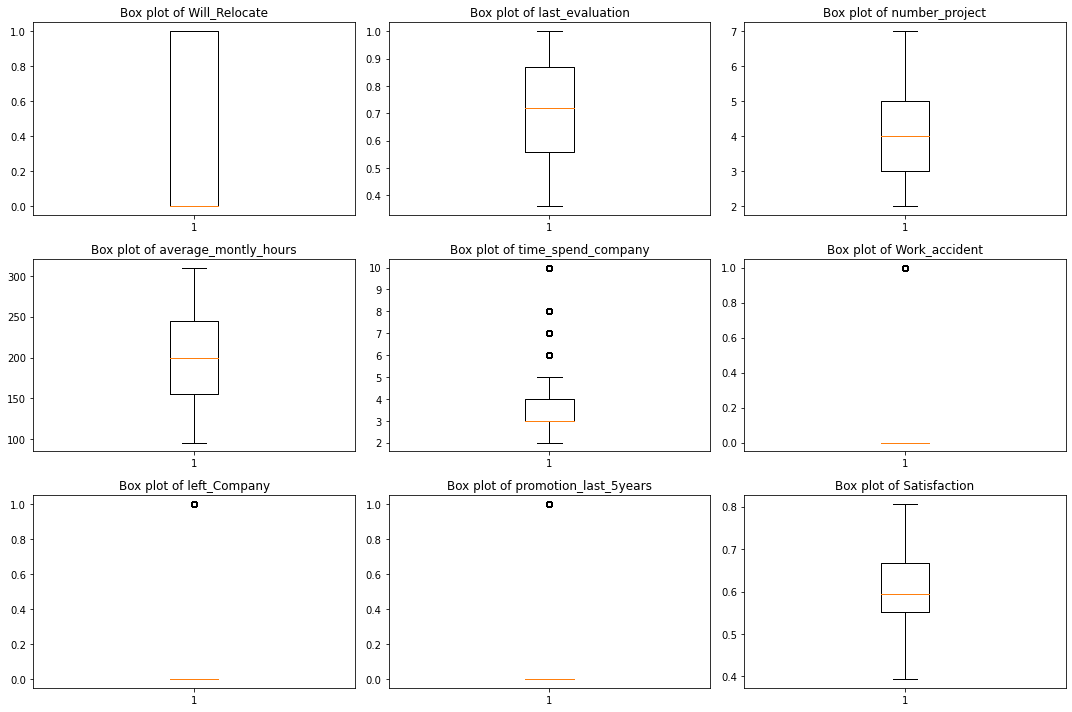

In [150]:
plt.figure(figsize = (15,10))

plt.subplot(3,3,1)
plt.boxplot(sub_data['Will_Relocate'])
plt.title('Box plot of Will_Relocate')


plt.subplot(3,3,2)
plt.boxplot(sub_data['last_evaluation'])
plt.title('Box plot of last_evaluation')

plt.subplot(3,3,3)
plt.boxplot(sub_data['number_project'])
plt.title('Box plot of number_project')

plt.subplot(3,3,4)
plt.boxplot(sub_data['average_montly_hours'])
plt.title('Box plot of average_montly_hours')

plt.subplot(3,3,5)
plt.boxplot(sub_data['time_spend_company'])
plt.title('Box plot of time_spend_company')


plt.subplot(3,3,6)
plt.boxplot(sub_data['Work_accident'])
plt.title('Box plot of Work_accident')

plt.subplot(3,3,7)
plt.boxplot(sub_data['left_Company'])
plt.title('Box plot of left_Company')

plt.subplot(3,3,8)
plt.boxplot(sub_data['promotion_last_5years'])
plt.title('Box plot of promotion_last_5years')

plt.subplot(3,3,9)
plt.boxplot(sub_data['Satisfaction'])
plt.title('Box plot of Satisfaction')

plt.tight_layout()
plt.show()

- We see some outliers present in 'time_spend_company', 'Work_accident', 'left_Company', 'promotion_last_5years' and 'Satisfaction' columns.

There are different ways to handle the outlier:

- We may delete outlier values if it is due to data entry error.
- We may impute outlier using mean, median, or zero and thus there is no loss of data.
- Quantile based flooring and capping.
- Another option is treating the outlier separately in the statistical model. So, we treat them in separate groups (with outlier, deleting outlier, impute outlier) and build individual model for each group and then check the output and find out what is the best way to handle the outlier.

#### 1. Checking the outliers in time_spend_company column

In [151]:
sub_data.time_spend_company.unique()

array([ 3,  2,  4,  5,  6, 10,  7,  8], dtype=int64)

It is the number of years of service, so we don't consider them as outliers.

#### 2. Checking the outliers in Work_accident column

In [152]:
sub_data.Work_accident.unique()

array([1, 0], dtype=int64)

It is containing unique 0 and 1 values, so we don't consider them as outliers.

#### 3. Checking the outliers in left_Company column

In [153]:
sub_data.left_Company.unique()

array([0, 1], dtype=int64)

It is containing unique 0 and 1 values, so we don't consider them as outliers.

#### 4. Checking the outliers in promotion_last_5years column

In [154]:
sub_data.promotion_last_5years.unique()

array([0, 1], dtype=int64)

It is containing unique 0 and 1 values, so we don't consider them as outliers.

#### 4. Checking the outliers in Satisfaction column

In [155]:
#getting the statistical summary of Satisfaction column data
sub_data.Satisfaction.describe() 

count    14999.000000
mean         0.604098
std          0.070502
min          0.393939
25%          0.551515
50%          0.593939
75%          0.666667
max          0.806061
Name: Satisfaction, dtype: float64

In [156]:
#detecting outliers using Inter Quartile Range
Q1 = np.percentile(sub_data['Satisfaction'], 25, interpolation = 'midpoint')
Q2 = np.percentile(sub_data['Satisfaction'], 50, interpolation = 'midpoint')
Q3 = np.percentile(sub_data['Satisfaction'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

outlier = []
for i in sub_data['Satisfaction']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no.of outliers present in the Satisfaction column:',len(outlier))

The no.of outliers present in the Satisfaction column: 0


- We can conclude that there is no data entry error, because the Satisfaction created using feature enginering. So, we don't need to delete any outlier value.
- However, in order to reduce the spread of data and create a better model, we may impute the outliers using the median value with the help of Inter Quartile Range (IQR).

In [157]:
#imputing outliers
satisfaction_median = sub_data['Satisfaction'].median() 
sub_data['Satisfaction'] = np.where(sub_data['Satisfaction'] > upp_limit , satisfaction_median , np.where(sub_data['Satisfaction'] < low_limit, satisfaction_median, sub_data['Satisfaction']))

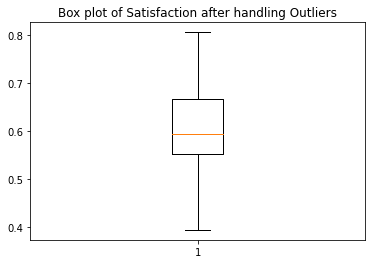

In [158]:
#checking whether the outlier is handled properly or not
plt.boxplot(sub_data['Satisfaction'])
plt.title('Box plot of Satisfaction after handling Outliers')
plt.show()

- We successfully handled all the outliers.

# 3. Exploratory Data Analysis

### 3.1. Univariate Analysis

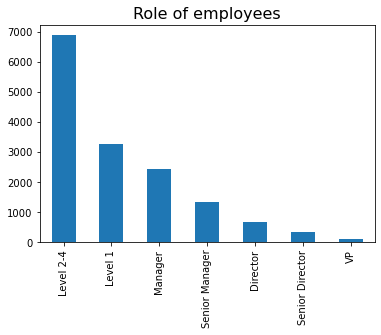

In [159]:
#role
sub_data['Role'].value_counts().plot(kind='bar')
plt.title("Role of employees",fontsize=16)
plt.show()

The dataset consists of details of employees working in almost all job levels ranging from level 1 to Executive management role like VP. Most of the employees in the dataset are in Level 2-4. Very few are in VP(Vice President).

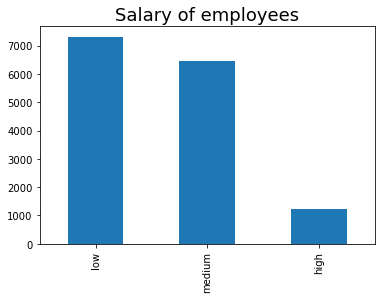

In [160]:
#salary
sub_data['salary'].value_counts().plot(kind='bar')
plt.title("Salary of employees",fontsize=18)
plt.show()

The salary is divided into three levels: low, medium, and high. Most of the employees are having low salary and very few are having high salary. We already saw that as the management level is increasing, the number of employees are decreasing and this reflected in the case of salary also.

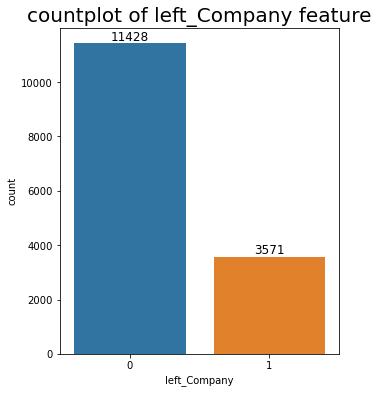

In [161]:
#left_company
plt.figure(figsize = (5,6))
plot = sns.countplot(x='left_Company',data=sub_data)
plt.title("countplot of left_Company feature",fontsize=20)
#labelling the bars with the data value
plt.bar_label(plot.containers[0],fontsize=12)
plt.show()

Out of the total 14999 employees, 3571(about 23.8%) employees left the company.

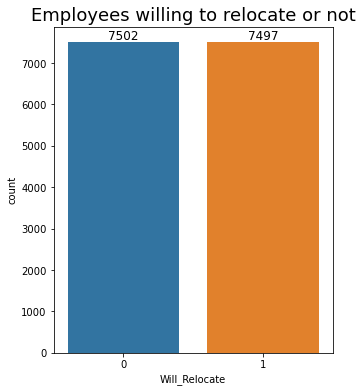

In [162]:
#Will_Relocate
plt.figure(figsize = (5,6))
plot = sns.countplot(x='Will_Relocate',data=sub_data)
plt.title("Employees willing to relocate or not",fontsize=18)
#labelling the bars with the data value
plt.bar_label(plot.containers[0],fontsize=12)
plt.show()

There is no much diffrence between employees, who willing to relocate or not. 

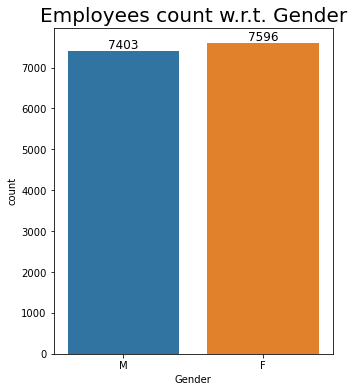

In [163]:
#gender
plt.figure(figsize = (5,6))
plot = sns.countplot(x='Gender',data=sub_data)
plt.title("Employees count w.r.t. Gender",fontsize=20)
#labelling the bars with the data value
plt.bar_label(plot.containers[0],fontsize=12)
plt.show()

The number of female employees are slightly higher than that of the male employees.

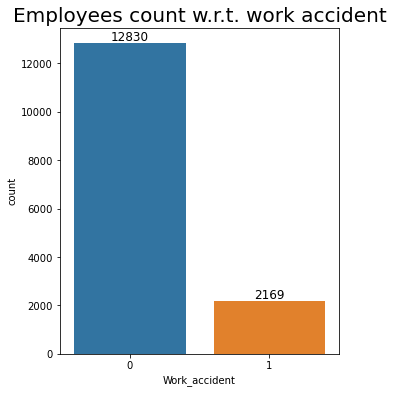

In [164]:
#work accident
plt.figure(figsize = (5,6))
plot = sns.countplot(x='Work_accident',data=sub_data)
plt.title("Employees count w.r.t. work accident",fontsize=20)
#labelling the bars with the data value
plt.bar_label(plot.containers[0],fontsize=12)
plt.show()

Of the total employees, 2169(about 14.4%) employees encountered with work accidents.

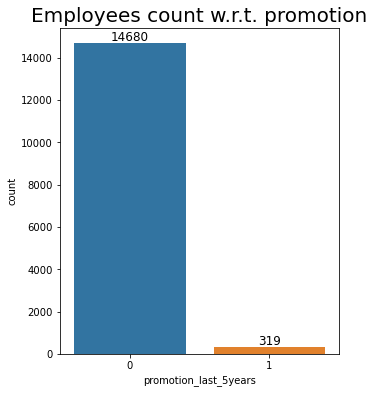

In [165]:
#promotion in last 5 years
plt.figure(figsize = (5,6))
plot = sns.countplot(x='promotion_last_5years',data=sub_data)
plt.title("Employees count w.r.t. promotion",fontsize=20)
#labelling the bars with the data value
plt.bar_label(plot.containers[0],fontsize=12)
plt.show()

Only 319(about 2%) employees got promoted in the last five years.

In [166]:
#getting statistical summary of non-nominal and non-categorical features
sub_data.drop(['left_Company','Will_Relocate','Work_accident','promotion_last_5years'],axis=1).describe()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Satisfaction
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.716102,3.803054,201.050337,3.498233,0.604098
std,0.171169,1.232592,49.943099,1.460136,0.070502
min,0.360000,2.000000,96.000000,2.000000,0.393939
25%,0.560000,3.000000,156.000000,3.000000,0.551515
50%,0.720000,4.000000,200.000000,3.000000,0.593939
75%,0.870000,5.000000,245.000000,4.000000,0.666667
max,1.000000,7.000000,310.000000,10.000000,0.806061


In [167]:
sub_data.describe(include = 'object')

,Role,salary,Gender
count,14999,14999,14999
unique,7,3,2
top,Level 2-4,low,F
freq,6889,7316,7596


### 3.2. Bivariate Analysis

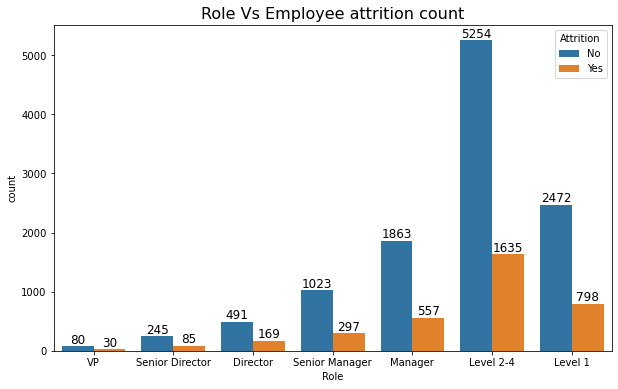

In [168]:
#role-leftcompany
plt.figure(figsize=(10,6))
plot = sns.countplot(x='Role',hue='left_Company',data=sub_data)
plt.title("Role Vs Employee attrition count",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['No', 'Yes'])
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

About 22-27% of employees from each Role left the company.

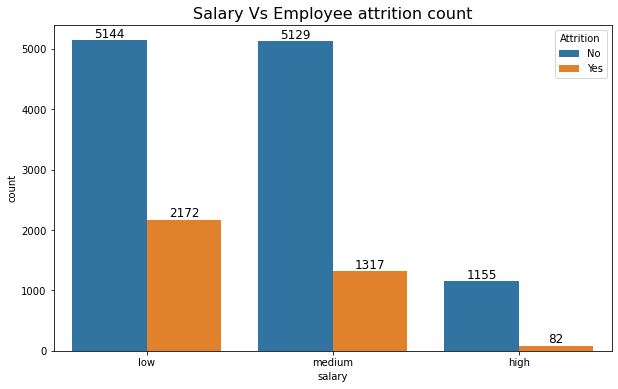

In [169]:
#salary-leftCompany
plt.figure(figsize=(10,6))
plot = sns.countplot(x='salary',hue='left_Company',data=sub_data)
plt.title("Salary Vs Employee attrition count",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['No', 'Yes'])
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

More proportion(about 29%) of employees with low salary left from the company, while in case of employees with high salary, very small proportion(6%) left from the company. This indicates that a high salary and higher work role can prevent employee attrition to an extend.

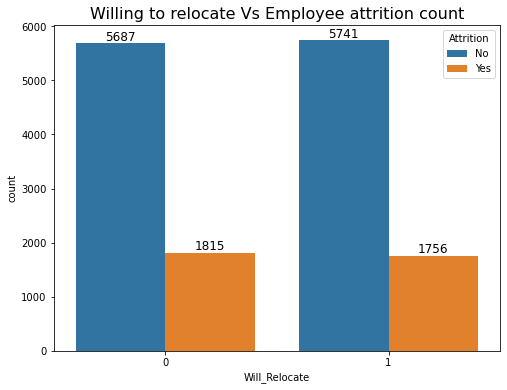

In [170]:
#relocate-leftCompany
plt.figure(figsize=(8,6))
plot = sns.countplot(x='Will_Relocate',hue='left_Company',data=sub_data)
plt.title("Willing to relocate Vs Employee attrition count",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['No', 'Yes'])
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

From the above bar graph it can be inferred that the employee's willingness to relocate does not have a significant impact on attrition.

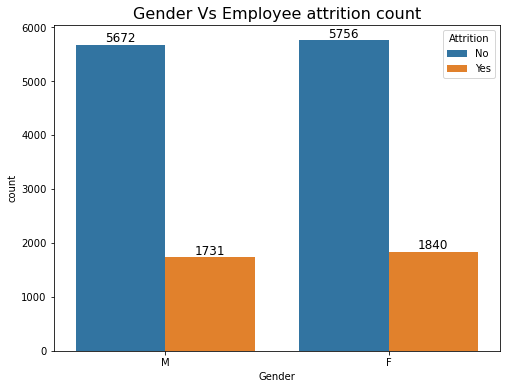

In [171]:
#gender-leftCompany
plt.figure(figsize=(8,6))
plot = sns.countplot(x='Gender',hue='left_Company',data=sub_data)
plt.title("Gender Vs Employee attrition count",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['No', 'Yes'])
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

As in the case of employee's willingness to relocate, the gender of the employee is also not having an impact on employee attrition.

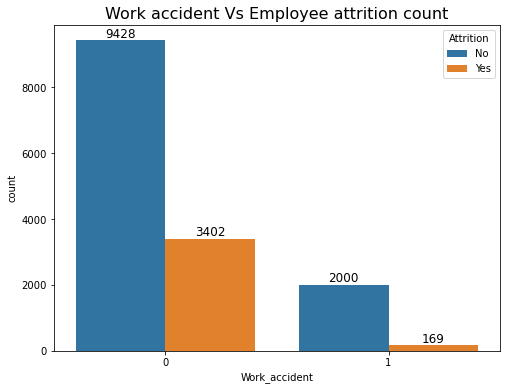

In [172]:
#workAccident-leftCompany
plt.figure(figsize=(8,6))
plot = sns.countplot(x='Work_accident',hue='left_Company',data=sub_data)
plt.title("Work accident Vs Employee attrition count",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['No', 'Yes'])
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

We can not say work accident have a huge role in employee attrition. The percentage of employee left w.r.t no work accident 26% and w.r.t work accident 7%

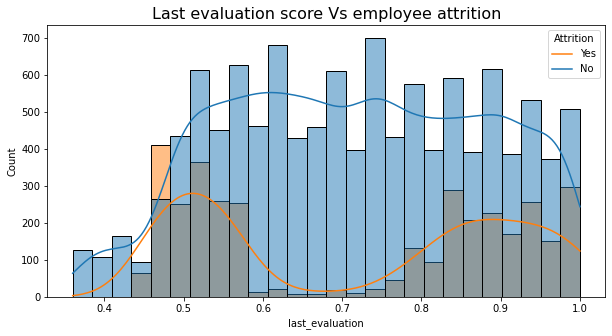

In [173]:
#last_evaluation score and employee attrition
plt.figure(figsize=(10,5))
sns.histplot(data=sub_data, x="last_evaluation", hue="left_Company",kde=True)
plt.title("Last evaluation score Vs employee attrition",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['Yes', 'No'])
plt.show()

Employees having average evaluation score continues to stay in the company. This may be because they are average performers and they willing to continue and improvise.

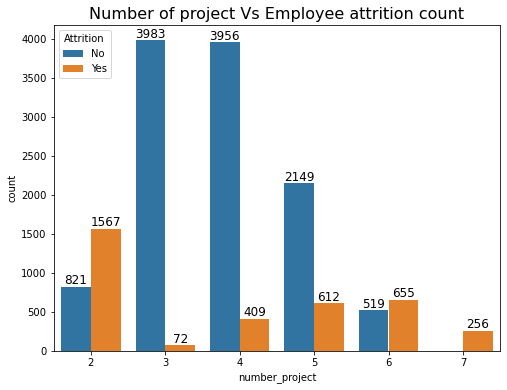

In [174]:
#number of project and employee attrition
plt.figure(figsize=(8,6))
plot = sns.countplot(x='number_project',hue='left_Company',data=sub_data)
plt.title("Number of project Vs Employee attrition count",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['No', 'Yes'])
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

We can't say any is there any strong relation between no.of projects and employee attrition. However, we may say that employess prefer no.of project between 3-5 and continuing their work at company. 

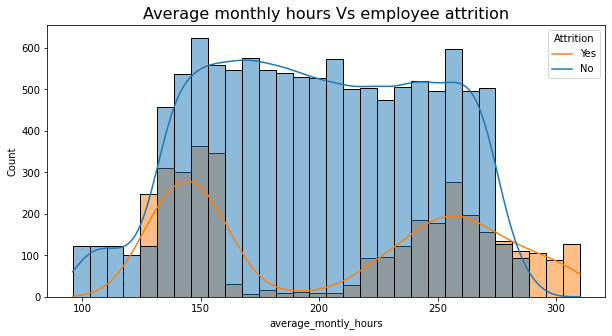

In [175]:
#average monthly hours and employee attrition
plt.figure(figsize=(10,5))
sns.histplot(data=sub_data, x="average_montly_hours", hue="left_Company",kde=True)
plt.title("Average monthly hours Vs employee attrition",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['Yes', 'No'])
plt.show()

Employee who is working on an average of around 190 hours a month(8 hours a day with two weekend days off) seems to continue within the company. There are some employees who works on an average of 300 hours a month(more than 13 hours a day with two weekend days off) and obviously, they left the company.

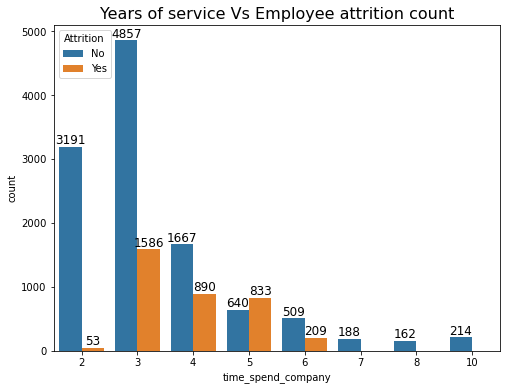

In [176]:
#years of service and employee attrition
plt.figure(figsize=(8,6))
plot = sns.countplot(x='time_spend_company',hue='left_Company',data=sub_data)
plt.title("Years of service Vs Employee attrition count",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['No', 'Yes'])
plt.bar_label(plot.containers[0],fontsize=12)
plt.bar_label(plot.containers[1],fontsize=12)
plt.show()

Most of the employees worked for three years. Based on years of service, the employee attrition does not follow a particular pattern except after completing 7 years of service. Employees who stayed with the company for more than 7 years can get higher job role and hence higher salary. May be because of that they didn't leave the company.

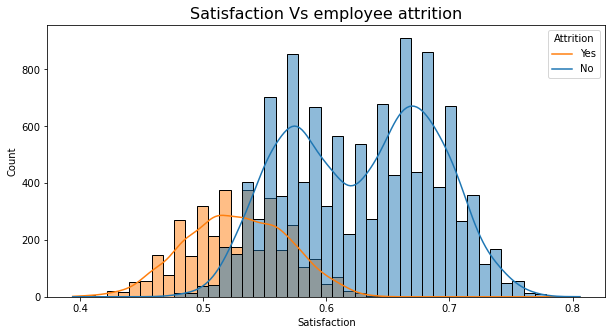

In [177]:
#satisfaction and employee attrition
plt.figure(figsize=(10,5))
sns.histplot(data=sub_data, x="Satisfaction", hue="left_Company",kde=True)
plt.title("Satisfaction Vs employee attrition",fontsize=16)
plt.legend(title='Attrition', loc='best', labels=['Yes', 'No'])
plt.show()

From the graph we can clearly see that those employees who have a low satisfaction level left the company.

# 2b. Pre-processing (2nd Stage)

#### 2.5. Encoding

In [178]:
sub_data.head()

,Role,Will_Relocate,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,salary,Gender,Satisfaction
0,VP,0,0.36,3,168,3,1,0,0,low,M,0.539394
1,Senior Director,0,0.36,5,159,2,0,0,0,low,F,0.581818
2,Senior Director,0,0.36,2,282,3,0,0,0,medium,F,0.587879
3,Senior Director,0,0.36,4,278,4,1,0,0,high,M,0.557576
4,Director,0,0.36,6,256,5,0,0,0,low,F,0.636364


- There are few categorical columns present in the dataset. With the help of Encoding, we will handle them.

#### One Hot Encoding

In [179]:
sub_data = pd.get_dummies(sub_data)
sub_data.head()

,Will_Relocate,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,Satisfaction,Role_Director,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,salary_high,salary_low,salary_medium,Gender_F,Gender_M
0,0,0.36,3,168,3,1,0,0,0.539394,0,0,0,0,0,0,1,0,1,0,0,1
1,0,0.36,5,159,2,0,0,0,0.581818,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0.36,2,282,3,0,0,0,0.587879,0,0,0,0,1,0,0,0,0,1,1,0
3,0,0.36,4,278,4,1,0,0,0.557576,0,0,0,0,1,0,0,1,0,0,0,1
4,0,0.36,6,256,5,0,0,0,0.636364,1,0,0,0,0,0,0,0,1,0,1,0


- We now converted all the categorical columns to its corresponding numerical using One Hot Encoding

#### 2.6. Standardization/Normalization

In [180]:
# Making the column 'left_Company' as target vector and others as feature matrix

In [181]:
X = sub_data.drop(['left_Company'], axis = 1)
y = sub_data['left_Company']

In [182]:
X.describe()

,Will_Relocate,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Satisfaction,Role_Director,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,salary_high,salary_low,salary_medium,Gender_F,Gender_M
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.499833,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.604098,0.044003,0.218015,0.459297,0.161344,0.022001,0.088006,0.007334,0.082472,0.487766,0.429762,0.506434,0.493566
std,0.500017,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.070502,0.205108,0.412911,0.498357,0.367860,0.146693,0.283313,0.085326,0.275092,0.499867,0.495059,0.499975,0.499975
min,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.393939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.551515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.593939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,0.806061,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We see that columns values are in different scales. We will now standardise the column values

In [183]:
col_names = X.columns

from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)
X = pd.DataFrame(X,columns = col_names)
np.round(X.describe(),5)

,Will_Relocate,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Satisfaction,Role_Director,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,salary_high,salary_low,salary_medium,Gender_F,Gender_M
count,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000,14999.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003
min,-0.99967,-2.08048,-1.46286,-2.10347,-1.02613,-0.41117,-0.14741,-2.98099,-0.21454,-0.52801,-0.92165,-0.43862,-0.14999,-0.31064,-0.08595,-0.29981,-0.97582,-0.86813,-1.01295,-0.98721
25%,-0.99967,-0.91200,-0.65154,-0.90206,-0.34124,-0.41117,-0.14741,-0.74586,-0.21454,-0.52801,-0.92165,-0.43862,-0.14999,-0.31064,-0.08595,-0.29981,-0.97582,-0.86813,-1.01295,-0.98721
50%,-0.99967,0.02278,0.15979,-0.02103,-0.34124,-0.41117,-0.14741,-0.14410,-0.21454,-0.52801,-0.92165,-0.43862,-0.14999,-0.31064,-0.08595,-0.29981,-0.97582,-0.86813,0.98721,-0.98721
75%,1.00033,0.89913,0.97111,0.88002,0.34366,-0.41117,-0.14741,0.88750,-0.21454,-0.52801,1.08501,-0.43862,-0.14999,-0.31064,-0.08595,-0.29981,1.02478,1.15190,0.98721,1.01295
max,1.00033,1.65864,2.59376,2.18155,4.45300,2.43211,6.78372,2.86473,4.66109,1.89390,1.08501,2.27990,6.66720,3.21914,11.63420,3.33546,1.02478,1.15190,0.98721,1.01295


- Now our dataset is standardised (Standardize features by removing the mean and scaling to unit variance.)

# 4. Modelling

A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

Some of the common types of classification algorithms are: Logistic Regression, K-Nearest Neighbours, Support Vector Machine, Decision Tree, and Random Forest.

- The main steps involved in building a classification model:

  1. Initialize the classifier.
  2. Train the classifier.
  3. Predict the target.
  4. Evaluate the classification model.

<B>Building the various Classification models<B>

In [184]:
# importing alll the necessary libraries to use in various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K Nearest Neighbours
from sklearn.svm import SVC # for Support Vector Machine (SVM) Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier #for using Random Forest Algoithm

In [185]:
# importing necessary libraries for checking the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

<B>1. Logistic Regression<B>

In [187]:
logit_model = LogisticRegression(max_iter = 700)
#training the model
logit_model.fit(X_train,y_train) 
#predicting the data
y_predictions = logit_model.predict(X_test)
#measuring performance
logit_model_as = accuracy_score(y_test,y_predictions)
logit_model_f1 = f1_score(y_test,y_predictions)

confusion_matrix(y_test,y_predictions)

array([[3278,  180],
       [ 218,  824]], dtype=int64)

<B>2. K-Nearest Neighbours(KNN)<B>

- Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

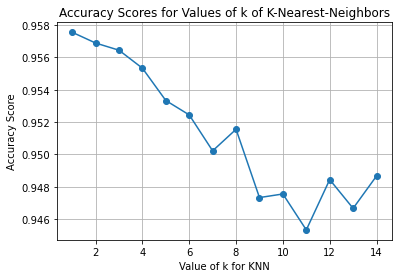

In [188]:
# Experimenting with different k values

k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predictions = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_predictions))
    
plt.plot(k_range, scores,marker="o")
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of K-Nearest-Neighbors')
plt.grid()
plt.show()  

In [189]:
# For this particular dataset, we obtain the highest accuracy when k=6.

In [190]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train,y_train)
y_predictions = knn_model.predict(X_test)

knn_model_as = accuracy_score(y_test,y_predictions)
knn_model_f1 = f1_score(y_test,y_predictions)

confusion_matrix(y_test,y_predictions)

array([[3391,   67],
       [ 147,  895]], dtype=int64)

<B>3. Support Vector Machine (SVM)<B>

- Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In [191]:
svm_model = SVC(kernel = 'rbf') 
svm_model.fit(X_train,y_train) 
y_predictions = svm_model.predict(X_test) 

svm_model_as = accuracy_score(y_test,y_predictions)
svm_model_f1 = f1_score(y_test,y_predictions)

confusion_matrix(y_test,y_predictions)

array([[3410,   48],
       [  75,  967]], dtype=int64)

<b>4. Decision Tree<B>

- Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

In [192]:
dTree_model = DecisionTreeClassifier()
dTree_model.fit(X_train,y_train)
y_predictions = dTree_model.predict(X_test)

dTree_model_as = accuracy_score(y_test,y_predictions)
dTree_model_f1 = f1_score(y_test,y_predictions)

confusion_matrix(y_test,y_predictions)

array([[3394,   64],
       [  46,  996]], dtype=int64)

<b>5. Creating a Random Forest algorithm<b>

- Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

In [193]:
rForest_model = RandomForestClassifier()
rForest_model.fit(X_train,y_train)
y_predictions = rForest_model.predict(X_test)

rForest_model_as = accuracy_score(y_test,y_predictions)
rForest_model_f1 = f1_score(y_test,y_predictions)

confusion_matrix(y_test,y_predictions)

array([[3440,   18],
       [  57,  985]], dtype=int64)

<b> Comparing the Accuracy and F1 scores of diffrent models<b>

In [194]:
score = pd.DataFrame({'Model' : ['Logistic Regression', 'K-Nearest Neighbours', 'Support Vector Machine', 'Decision Tree', 'Random Forest'],
                      'Accuracy' : [logit_model_as , knn_model_as, svm_model_as, dTree_model_as, rForest_model_as ],
                      'F1-score' : [logit_model_f1,knn_model_f1,svm_model_f1, dTree_model_f1, rForest_model_f1]})
score.style.hide_index() 


Model,Accuracy,F1-score
Logistic Regression,0.911556,0.805474
K-Nearest Neighbours,0.952444,0.893214
Support Vector Machine,0.972667,0.940204
Decision Tree,0.975556,0.947669
Random Forest,0.983333,0.963325


- From the above table, we can see that all the models are good and from those Random Forest and SVM models are the best models for this data set.

# 5) Model fine tuning

#### 1. Feature importances

In [195]:
pd.DataFrame(rForest_model.feature_importances_ , index = X.columns, columns = ['Feature Importance']).sort_values(by='Feature Importance',ascending=False)*100

,Feature Importance
Satisfaction,35.434438
number_project,16.504616
last_evaluation,16.344360
average_montly_hours,14.288603
time_spend_company,12.462753
Work_accident,0.989071
salary_low,0.855661
Will_Relocate,0.445667
salary_high,0.437683
salary_medium,0.317189


- We will drop the features with a low Feature Importance score and re-check if it is improving our model.

In [196]:
X_sub = X.drop(['Role_VP','promotion_last_5years','Role_Senior Director','Role_Senior Manager','Role_Manager','salary_medium','Role_Level 1','Gender_M','Gender_F'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, random_state = 2, test_size = .3)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predictions = rf.predict(X_test)

print('Accuracy score is:', accuracy_score(y_test,y_predictions))
print('F1 score is:', f1_score(y_test,y_predictions))
confusion_matrix(y_test,y_predictions)

Accuracy score is: 0.9846666666666667
F1 score is: 0.9681587448084911


array([[3382,   20],
       [  49, 1049]], dtype=int64)

- We see that it not improved our model 

#### 2. Fine Tuning of Hyperparameters

Hyperparameters are those parameters which can be arbitrarily set by the user before starting training (eg. number of estimators in Random Forest).

We have a set of hyperparameters and we aim to find the right combination of their values which can help us to improve our model performance.

The scores with-out Tuning of Hyperparameters
- Accuracy score is: 0.984000
- F1 score is: 0.964706

In [197]:
# Set n_estimators = 100, criterion = 'entropy', max_depth = 10, and random_state = 42

In [198]:
rft_mod2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 10, random_state = 42 )
rft_mod2.fit(X_train, y_train)
y_predictions = rft_mod2.predict(X_test)

print('Accuracy score is:', accuracy_score(y_test,y_predictions))
print('F1 score is:', f1_score(y_test,y_predictions))

confusion_matrix(y_test,y_predictions)

Accuracy score is: 0.9833333333333333
F1 score is: 0.9653259361997226


array([[3381,   21],
       [  54, 1044]], dtype=int64)

- Not much improvement

In [199]:
# Set n_estimators = 500, criterion = 'entropy', max_depth = 20, and random_state = 42

In [200]:
rft_mod3 = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth = 20, random_state = 42 )
rft_mod3.fit(X_train, y_train)
y_predictions = rft_mod3.predict(X_test)

print('Accuracy score is:', accuracy_score(y_test,y_predictions))
print('F1 score is:', f1_score(y_test,y_predictions))

confusion_matrix(y_test,y_predictions)

Accuracy score is: 0.9848888888888889
F1 score is: 0.9686635944700461


array([[3381,   21],
       [  47, 1051]], dtype=int64)

- a slight improvment

- We do not see any significance improvement in the model performance. We understand that the orginal model itself providing us good accuracy and F1 score, so we will continue with our model.

Thank You.